## Case Study
**1.** Plot barplot pada city
1. Bagaimana caranya supaya Barplot memiliki tampilan informatif ?
2. Daftarkan insightnya

**2.** Eksplorasi dan mencoba looping pada kolom dan baris dataframe `dataset_for_manipulation.csv`
- for loop
- while loop
- nested loop

**3** Manipulasi yang menghasilkan insight untuk memproses dataframe menggunakan `lambda function` pada :
1. kolom numerikal
2. kolom kategorikal
3. Tulis insightnya


# Import Modules

In [1]:
! pip install matplotlib
! pip install seaborn

In [2]:
# dataframe libraries
import pandas as pd

# array libraries
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Math libraries
import math

# Dataset

In [3]:
# Membaca dataset Untuk Google Colab
df = pd.read_csv('dataset_for_manipulation.csv')
df

,Age,Salary,Height,Gender,Marital Status,Education Level,Job Satisfaction,City,Province
0,47.457284,25867.758709,40.880220,Female,Married,Bachelor's,Low,Malang,Jawa Timur
1,39.202564,31171.212403,42.934217,Female,Single,Bachelor's,Low,Pontianak,Kalimantan Barat
2,49.419951,26938.438051,76.937048,Female,Divorced,Bachelor's,High,Depok,Jawa Barat
3,60.799388,38376.824337,33.346494,Female,Divorced,PhD,High,Bogor,Jawa Barat
4,37.956006,66077.876060,89.834535,Male,Divorced,Master's,High,Pontianak,Kalimantan Barat
...,...,...,...,...,...,...,...,...,...
9995,57.914327,44086.710685,67.770053,Female,Married,Master's,High,Balikpapan,Kalimantan Timur
9996,15.021515,72307.511004,1.870512,Female,Married,Master's,Low,Malang,Jawa Timur
9997,31.830883,43878.379554,65.746939,Male,Married,Master's,Low,Jakarta,DKI Jakarta
9998,47.444952,85542.179834,98.350702,Male,Divorced,Bachelor's,Low,Bandung,Jawa Barat


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               10000 non-null  float64
 1   Salary            10000 non-null  float64
 2   Height            10000 non-null  float64
 3   Gender            10000 non-null  object 
 4   Marital Status    10000 non-null  object 
 5   Education Level   10000 non-null  object 
 6   Job Satisfaction  10000 non-null  object 
 7   City              10000 non-null  object 
 8   Province          10000 non-null  object 
dtypes: float64(3), object(6)
memory usage: 703.2+ KB


# Preprocessing

Melakukan sedikit preprocessing  khusus untuk kolom 'Age'

*   Identifikasi Null atau Missing Values
*   Pembulatan ke atas nilai usia pada kolom "Age"
*   Mengubah nilai negatif pada kolom "Age" menjadi nilai median dari seluruh observasi pada kolom "Age"
*   Buat kolom baru untuk mengklasifikasikan setiap rentang usia. Kolom tersebut diberi nama "klasifikasi_umur"



#Identifikasi Null atau Missing Values


In [5]:
#Identifikasi Nilai yang Hilang
#Tidak ada nilai yang hilang
df.isna().sum()

,0
Age,0
Salary,0
Height,0
Gender,0
Marital Status,0
Education Level,0
Job Satisfaction,0
City,0
Province,0


#Pembulatan ke atas nilai usia pada fitur "Age"

In [6]:
#Rounding up the age in data

# Mendefinisikan fungsi untuk membulatkan ke atas menggunakan ceil
def ceil_round(x):
    return math.ceil(x)

# Menerapkan fungsi menggunakan lambda
df['Age'] = df['Age'].apply(lambda x: ceil_round(x))

# Mengecek dengan menampilkan beberapa baris pertama untuk memverifikasi kolom baru
df[['Age']].head()

,Age
0,48
1,40
2,50
3,61
4,38


#Mengubah nilai negatif pada kolom "Age" menjadi nilai median dari seluruh observasi pada kolom "Age"

In [7]:
#Perhatikan di sini ada nilai minimum negatif dalam kolom "Age", yang merupakan data yang tidak konsisten
df['Age'].describe()

,Age
count,10000.000000
mean,41.475500
std,13.043888
min,-9.000000
25%,33.000000
50%,41.000000
75%,50.000000
max,93.000000


In [8]:
#Identifikasi observasi mana yang memiliki nilai negatif dalam kolom "Age"
df[df['Age'] < 0]

,Age,Salary,Height,Gender,Marital Status,Education Level,Job Satisfaction,City,Province
262,-1,48802.912169,26.020815,Female,Married,Bachelor's,Medium,Banda Aceh,Aceh
7611,-6,24191.704977,30.758125,Female,Married,Bachelor's,High,Depok,Jawa Barat
7677,-5,42759.020620,29.597299,Male,Single,Master's,Low,Batam,Kepulauan Riau
8180,-1,26232.726158,76.169196,Male,Divorced,PhD,Medium,Depok,Jawa Barat
8200,-8,59372.666559,94.475599,Male,Single,PhD,Low,Palembang,Sumatera Selatan
9770,-9,20190.102939,64.761494,Male,Single,Bachelor's,Low,Semarang,Jawa Tengah


In [9]:
#Karena ada nilai minus di kolom usia, kami memanipulasi data dengan engganti nilai usia <= 0 dengan nilai median.
#Dalam Statistik, median bersifat kuat dan tidak terpengaruh oleh outlier.
#Ganti nilai <= 0 dengan median kolom "Age"
median_age = df['Age'].median()
df['Age'] = df['Age'].apply(lambda x: median_age if x <= 0 else x)
df.head()

,Age,Salary,Height,Gender,Marital Status,Education Level,Job Satisfaction,City,Province
0,48.0,25867.758709,40.880220,Female,Married,Bachelor's,Low,Malang,Jawa Timur
1,40.0,31171.212403,42.934217,Female,Single,Bachelor's,Low,Pontianak,Kalimantan Barat
2,50.0,26938.438051,76.937048,Female,Divorced,Bachelor's,High,Depok,Jawa Barat
3,61.0,38376.824337,33.346494,Female,Divorced,PhD,High,Bogor,Jawa Barat
4,38.0,66077.876060,89.834535,Male,Divorced,Master's,High,Pontianak,Kalimantan Barat


In [10]:
#Identifikasi observasi mana yang memiliki nilai negatif dalam kolom "Age"
#Sukses! Tidak ada nilai minimum negatif dalam kolom "Age"
df['Age'].describe()
df[df['Age'] < 0]

,Age,Salary,Height,Gender,Marital Status,Education Level,Job Satisfaction,City,Province


#Buat kolom baru untuk mengklasifikasikan setiap rentang usia. Kolom tersebut diberi nama "klasifikasi_umur"

In [11]:
# Definisikan fungsi klasifikasi_umur
def klasifikasi_umur(age):
    if 5 <= age <= 11:
        return 'kanak-kanak'
    elif 12 <= age <= 25:
        return 'remaja'
    elif 26 <= age <= 45:
        return 'dewasa'
    elif 46 <= age <= 65:
        return 'lansia'
    else:
        return 'other'  # Untuk usia di luar rentang yang ditentukan

# Terapkan fungsi menggunakan ekspresi lambda
df['klasifikasi_umur'] = df['Age'].apply(lambda x: klasifikasi_umur(x))

In [12]:
#Menampilkan 5 baris pertama untuk mengecek
df.head()

,Age,Salary,Height,Gender,Marital Status,Education Level,Job Satisfaction,City,Province,klasifikasi_umur
0,48.0,25867.758709,40.880220,Female,Married,Bachelor's,Low,Malang,Jawa Timur,lansia
1,40.0,31171.212403,42.934217,Female,Single,Bachelor's,Low,Pontianak,Kalimantan Barat,dewasa
2,50.0,26938.438051,76.937048,Female,Divorced,Bachelor's,High,Depok,Jawa Barat,lansia
3,61.0,38376.824337,33.346494,Female,Divorced,PhD,High,Bogor,Jawa Barat,lansia
4,38.0,66077.876060,89.834535,Male,Divorced,Master's,High,Pontianak,Kalimantan Barat,dewasa


# **Jawaban Assignment**

#**1.** Plot barplot pada city, masih kurang informatif. Pertanyaan :
1. Bagaimana caranya supaya Barplot memiliki tampilan informatif ?

*   Menampilkan barplot yang mengandung bar dengan 5 frekuensi terbanyak
*   Menampilkan barplot yang mengandung bar dengan 10 frekuensi terbanyak
*   Mengurutkannya dari yang terbanyak ke yang tersedikit menggunakan value_counts()
*   Menampilkan nilai frekuensi di atas masing - masing bar
*   Membuat semua bar yang tidak mengandung frekuensi tertinggi satu warna saja menjadi biru menggunakan color = 'blue'
*   Membuat bar yang mengandung frekuensi tertinggi menjadi berwarna merah untuk menarik perhatian menggunakan get_patch
*   Menambahkan judul "City Barplot" untuk memperjelas isi visualisasi data
*   Menurut saya, nama sumbu x dan sumbu y sudah jelas jadi tidak saya ubah. Namun, jika ingin mengubah nama sumbu untuk memperjelas, maka bisa digunakan plt.xlabel dan plt.ylabel

2. Tulis insightnya ya !

*  Banda Aceh memiliki frekuensi paling banyak, dimana 546 observasi (baris) di dalam data memiliki nilai fitur "City" yakni "Banda Aceh"
*  5 kota yang memiliki frekuensi tertinggi secara berurutan adalah Banda Aceh, Malang, Jakarta, Bekasi, Balikpapan
* 10 kota yang memiliki frekuensi tertinggi secara berurutan adalah Banda Aceh, Malang, Jakarta, Bekasi, Balikpapan, Palembang, Depok, Denpasar, Bandung, Makassar
*  Secara umum frekuensi dari masing - masing kota  dalam fitur "City" memiliki pembagian yang sama dalam seluruh data, yakni 5% dari total data (Tambahan barplot).


**Barplot yang mengandung bar dengan 5 frekuensi terbanyak**

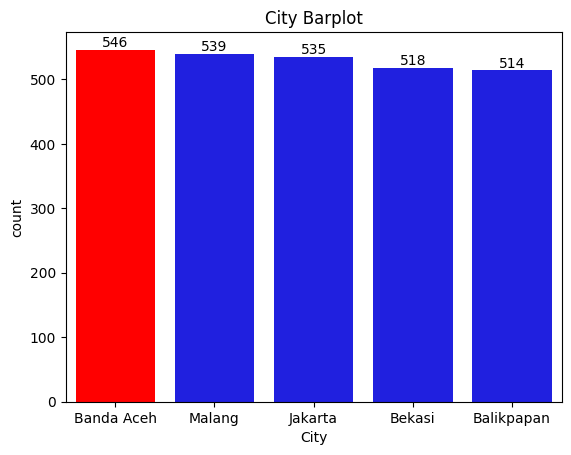

In [13]:
#Membuat countplot dengan nilai dalam urutan menurun
ax = sns.countplot(data=df, x='City', order=df['City'].value_counts().iloc[:5].index, color = 'blue')#Menggunakan iloc untuk mendapatkan 5 frekuensi tertinggi
abs_values = df['City'].value_counts(ascending=False).values
ax.bar_label(ax.containers[0])
plt.title('City Barplot')

# Mendapatkan bar tertinggi menggunakan patch
patch_h = [patch.get_height() for patch in ax.patches]
idx_tallest = np.argmax(patch_h)
# Mengubah warna bar tertinggi menjadi merah
ax.patches[idx_tallest].set_facecolor('red')

#Menampilkan plot
plt.show()

**Barplot yang mengandung bar dengan 10 frekuensi terbanyak**

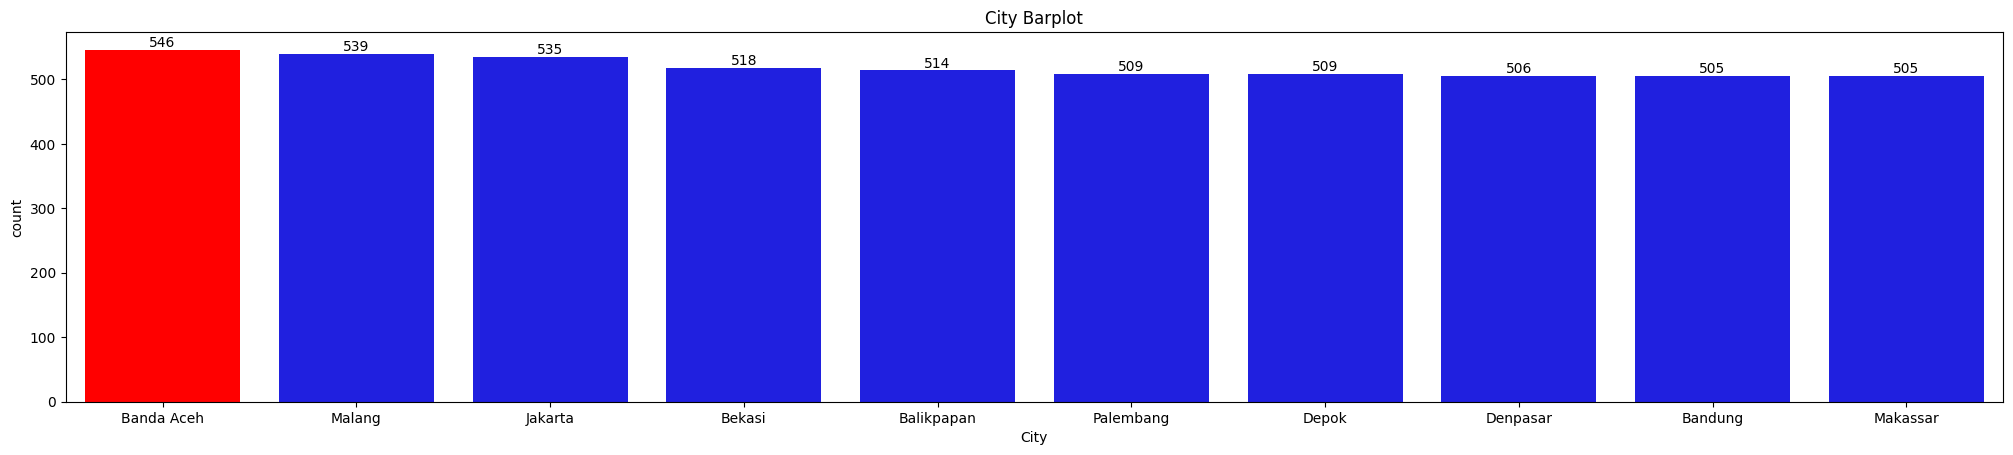

In [14]:
#Membuat ukuran plot lebih lebar agar dapat menvisualisasikan seluruh barplot
fig = plt.figure()
fig.set_size_inches(25, fig.get_figheight(), forward=True)

#Membuat countplot dengan nilai dalam urutan menurun
ax2 = sns.countplot(data=df, x='City', order=df['City'].value_counts().iloc[:10].index, color = 'blue')
abs_values = df['City'].value_counts(ascending=False).values
ax2.bar_label(ax2.containers[0])
plt.title('City Barplot')

#Mendapatkan bar tertinggi menggunakan patch
patch_h = [patch.get_height() for patch in ax2.patches]
idx_tallest = np.argmax(patch_h)
# Mengubah warna bar tertinggi menjadi merah
ax2.patches[idx_tallest].set_facecolor('red')

#Menampilkan plot
plt.show()


****(Tambahan) Barplot yang mengandung persentase dari total untuk bar dengan 5 frekuensi terbanyak****

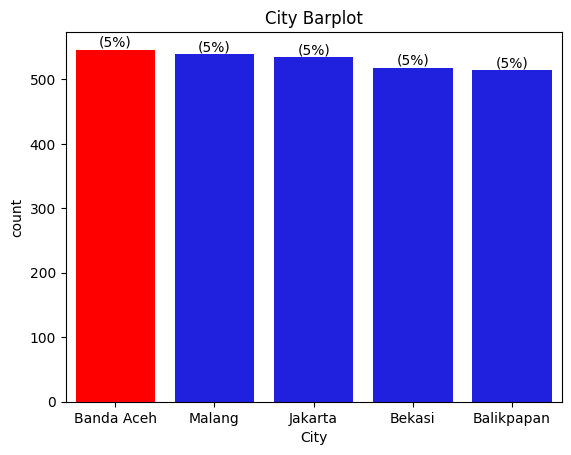

In [15]:
#Membuat countplot dengan nilai dalam urutan menurun
ax3 = sns.countplot(data=df, x='City', order=df['City'].value_counts().iloc[:5].index, color = 'blue') #Menggunakan iloc untuk mendapatkan 5 frekuensi tertinggi
rel_values = df['City'].value_counts(ascending=False, normalize=True).values * 100
rel_values = rel_values[:5] #Mendapatkan 5 frekuensi tertinggi
lbls = [f'({p[0]:.0f}%)' for p in zip(rel_values)]
ax3.bar_label(container=ax3.containers[0], labels=lbls)
plt.title('City Barplot')

#Mendapatkan bar tertinggi menggunakan patch
patch_h = [patch.get_height() for patch in ax3.patches]
idx_tallest = np.argmax(patch_h)

# Mengubah warna bar tertinggi menjadi merah
ax3.patches[idx_tallest].set_facecolor('red')

#Menampilkan plot
plt.show()


****(Tambahan) Barplot yang mengandung persentase dari total untuk bar dengan 5 frekuensi terbanyak****

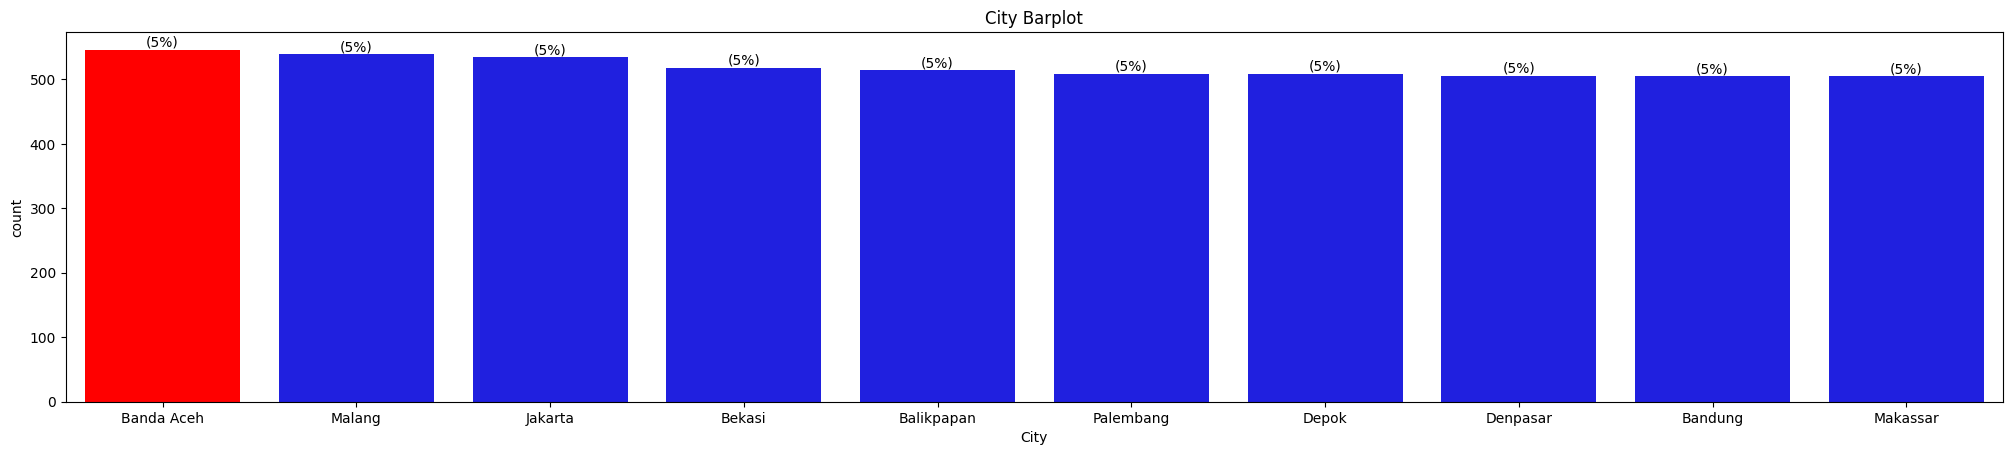

In [16]:
#Membuat ukuran plot lebih lebar agar dapat menvisualisasikan seluruh barplot
fig = plt.figure()
fig.set_size_inches(25, fig.get_figheight(), forward=True)

#Membuat countplot dengan nilai dalam urutan menurun
ax4 = sns.countplot(data=df, x='City', order=df['City'].value_counts().iloc[:10].index, color = 'blue') #Menggunakan iloc untuk mendapatkan 5 frekuensi tertinggi
rel_values = df['City'].value_counts(ascending=False, normalize=True).values * 100
rel_values = rel_values[:10] #Mendapatkan 10 frekuensi tertinggi
lbls = [f'({p[0]:.0f}%)' for p in zip(rel_values)]
ax4.bar_label(container=ax4.containers[0], labels=lbls)
plt.title('City Barplot')

#Mendapatkan bar tertinggi menggunakan patch
patch_h = [patch.get_height() for patch in ax3.patches]
idx_tallest = np.argmax(patch_h)

# Mengubah warna bar tertinggi menjadi merah
ax4.patches[idx_tallest].set_facecolor('red')

#Menampilkan plot
plt.show()

# **2.** Lakukan eksplorasi dan mencoba looping pada kolom dan baris dataframe `dataset_day5.csv`
#- for loop

1.   **Menghitung rata-rata gaji berdasarkan status job_satisfication menggunakan enumerate**. Hasilnya adalah \{'High': 41673.82855952048,'Medium': 41389.66599871149, Low': 41259.69166269229\}. Berdasarkan informasi tersebut, dapat disimpulkan suatu hipotesis bahwa semakin tinggi gaji, semakin tinggi kepuasaan.
2.   **Menghitung jumlah nilai unik dari kolom job_satisfication menggunakan iterrows**. Hasilnya adalah \{Low: 3291,
High: 3318, Medium: 3391\}. Berdasarkan informasi tersebut, dapat ditarik informasi bahwa persebaran status job_satisfication cukup seimbang.

3. **Mencari apakah ada nilai yang kurang dari nol (negatif) dari kolom Height menggunakan iterrows \(menampilkan index dan nilai negatif tersebut\)**. Hasilnya adalah ada. Jumlahnya adalah 670
Masalah ini diatasi lebih lanjut menggunakan lambda pada soal berikutnya.

4. **Mencari apakah ada nilai yang kurang dari nol (negatif) dari kolom Salary menggunakan iterrows \(menampilkan index dan nilai negatif tersebut\)**. Hasilnya adalah tidak terdapat nilai negatif.


#- while loop

1. **Mencari apakah ada orang - orang yang usianya di bawah 19 tahun tapi sudah menikah atau cerai  \(menampilkan index dan nilai tersebut\)**. Hasilnya adalah ada. Index dan nilai kolom dapat dilihat di dalam kodingan dibawah. Masalah ini diatasi lebih lanjut menggunakan lambda pada soal berikutnya.


2. **Mencari apakah ada orang - orang yang usianya di bawah 19 tahun tapi sudah memmiliki gelar Bachelor's, PhD, atau Master's  \(menampilkan index dan nilai tersebut\)**. Hasilnya adalah ada. Index dan nilai kolom dapat dilihat di dalam kodingan dibawah. Masalah ini diatasi lebih lanjut menggunakan lambda pada soal berikutnya.

3. **Mencari jumlah orang - orang yang tingginya di bawah 0**. Hasilnya adalah 670

#- nested loop

1. **Menggunakan loop bersarang untuk menghitung laki-laki dan perempuan dengan gelar yang berbeda**. Hasilnya adalah sebagai berikut,

- Number of males with bachelor's degrees: 1685
- Number of males with master's degrees: 1725
- Number of males with phd degrees: 1651
- Number of females with bachelor's degrees: 1687
- Number of females with master's degrees: 1635
- Number of females with phd degrees: 1617

# for loop

In [17]:
#Menghitung rata-rata gaji berdasarkan status job_satisfication
job_satisfication_by_salary = {"High": [], "Medium": [], "Low": []}

for idx, status in enumerate(df['Job Satisfaction']):
    if status in job_satisfication_by_salary :
        job_satisfication_by_salary[status].append(df['Salary'][idx])

job_satisfication_by_salary

# Menghitung rata-rata gaji untuk setiap status job satisfication
average_salary_by_job_satisfication = {status: sum(salaries)/len(salaries) for status, salaries in job_satisfication_by_salary.items()}
average_salary_by_job_satisfication

{'High': 41673.82855952048,
 'Medium': 41389.66599871149,
 'Low': 41259.69166269229}

In [18]:
#Menghitung jumlah nilai unik dari kolom job_satisfication menggunakan iterrows
job_satisfication_count = {}

for index, row in df.iterrows():
  job_satisfication = row['Job Satisfaction']
  if job_satisfication in job_satisfication_count:
    job_satisfication_count[job_satisfication] += 1
  else:
    job_satisfication_count[job_satisfication] = 1


for job_satisfication_status, count in job_satisfication_count.items():
  print(f"{job_satisfication_status}: {count}")

Low: 3291
High: 3318
Medium: 3391


In [19]:
#Mencari apakah ada nilai yang kurang dari nol (negatif) dari kolom Height menggunakan iterrows
neg_height = []
for index, row in df.iterrows():
    if row["Height"] < 0:
        print(index, row["Height"])
        neg_height.append(row["Height"])
len(neg_height)

7 -2.6996452620554976
9 -28.920963622995004
19 -13.618869823243898
20 -31.054955217512287
26 -15.878398398478453
84 -12.499107728831405
97 -14.366545642346011
102 -2.796818979704057
122 -10.263957728481444
126 -105.07767830919528
131 -11.631789706538283
137 -2.866830626786623
154 -6.555024064541328
171 -11.293567558012455
194 -9.419312594158498
214 -21.92607148626149
237 -20.529367135419648
257 -16.703647768912873
284 -35.64392541963622
297 -24.584289448575475
338 -17.370260737873252
353 -3.820448733720127
357 -27.604857052809308
362 -21.55311909832432
367 -3.0658015242177328
372 -3.674637978214293
378 -2.450634130845174
396 -37.28934579118851
398 -0.0498085461976245
402 -21.997071250399472
408 -7.43206438047261
425 -36.929964329542685
441 -11.239882336512892
455 -1.5377477685757128
507 -10.308035990278938
524 -2.502124357507938
526 -36.58255540754058
527 -9.579619257218924
538 -24.894482024013456
564 -22.3468877798137
576 -2.3966561501600268
578 -1.810909164648848
597 -7.8624713611794

670

In [20]:
#Mencari apakah ada nilai yang kurang dari nol (negatif) dari kolom Salary menggunakan iterrows
for index, row in df.iterrows():
    if row["Salary"] < 0:
        print(index, row["Salary"])

In [21]:
#Menggunakan value_count untuk menghitung jumlah nilai unik dari masing - masing kolom secara sederhana
for col in df.columns:
    print(f"===={col}====")
    print(df[col].value_counts())

====Age====
Age
41.0    334
44.0    313
39.0    310
42.0    304
43.0    299
       ... 
87.0      1
93.0      1
84.0      1
92.0      1
85.0      1
Name: count, Length: 88, dtype: int64
====Salary====
Salary
25867.758709     1
15626.365745     1
61048.252557     1
38302.572431     1
49885.289407     1
                ..
119646.746381    1
59973.414804     1
68374.926222     1
32991.306451     1
16155.892106     1
Name: count, Length: 10000, dtype: int64
====Height====
Height
40.880220    1
71.205533    1
64.276962    1
84.014232    1
72.073448    1
            ..
35.078278    1
51.948396    1
72.160855    1
75.937799    1
58.227571    1
Name: count, Length: 10000, dtype: int64
====Gender====
Gender
Male      5061
Female    4939
Name: count, dtype: int64
====Marital Status====
Marital Status
Single      3368
Married     3366
Divorced    3266
Name: count, dtype: int64
====Education Level====
Education Level
Bachelor's    3372
Master's      3360
PhD           3268
Name: count, dtype: int6

#while loop

In [22]:
# While Loop untuk mencari jumlah orang - orang yang usianya di bawah 19 tahun tapi sudah menikah atau cerai
i = 0 # assign nilai awal
ages_below_19_married_or_divorced = {}
while i < len(df):
    index, row = i, df.iloc[i]
    if row['Age'] < 19:
      if row['Marital Status'] == 'Single':
        pass
      else:
        ages_below_19_married_or_divorced[index] = row['Age'],row['Marital Status']
    i += 1 # akan bertambah 1 setiap prosesnya

In [23]:
#Menampilkan dictionary dimana keynya adalah index di dataframe dan di dalamnya itu nilai 'Age' dan 'Marital Status' secara berurutan
ages_below_19_married_or_divorced

{37: (16.0, 'Married'),
 79: (16.0, 'Married'),
 110: (17.0, 'Married'),
 221: (17.0, 'Divorced'),
 236: (15.0, 'Married'),
 382: (14.0, 'Married'),
 442: (15.0, 'Divorced'),
 471: (12.0, 'Divorced'),
 525: (18.0, 'Divorced'),
 544: (9.0, 'Divorced'),
 568: (17.0, 'Divorced'),
 575: (13.0, 'Married'),
 608: (18.0, 'Divorced'),
 740: (18.0, 'Married'),
 933: (13.0, 'Divorced'),
 975: (17.0, 'Married'),
 1061: (4.0, 'Divorced'),
 1097: (16.0, 'Divorced'),
 1160: (9.0, 'Divorced'),
 1286: (18.0, 'Divorced'),
 1289: (14.0, 'Married'),
 1325: (16.0, 'Divorced'),
 1346: (8.0, 'Married'),
 1355: (8.0, 'Married'),
 1513: (17.0, 'Married'),
 1539: (4.0, 'Divorced'),
 1562: (10.0, 'Divorced'),
 1591: (4.0, 'Married'),
 1594: (11.0, 'Married'),
 1750: (6.0, 'Divorced'),
 1753: (18.0, 'Divorced'),
 1790: (17.0, 'Married'),
 1804: (18.0, 'Divorced'),
 1914: (18.0, 'Married'),
 1926: (9.0, 'Divorced'),
 1950: (18.0, 'Married'),
 1971: (3.0, 'Married'),
 2004: (17.0, 'Married'),
 2017: (15.0, 'Divorc

In [24]:
# While Loop untuk mencari jumlah orang - orang yang usianya di bawah 19 tahun tapi sudah memmiliki gelar Bachelor's, PhD, atau Master's
i = 0 # assign nilai awal
ages_below_19_Education_Level= {}
while i < len(df):
    index, row = i, df.iloc[i]
    if row['Age'] < 19:
        ages_below_19_Education_Level[index] = row['Age'],row['Education Level']
    i += 1 # akan bertambah 1 setiap prosesnya

In [25]:
ages_below_19_Education_Level

{13: (17.0, 'PhD'),
 37: (16.0, "Bachelor's"),
 74: (7.0, "Bachelor's"),
 79: (16.0, "Master's"),
 110: (17.0, 'PhD'),
 221: (17.0, "Bachelor's"),
 236: (15.0, 'PhD'),
 285: (16.0, "Bachelor's"),
 382: (14.0, "Master's"),
 431: (15.0, "Bachelor's"),
 442: (15.0, "Bachelor's"),
 471: (12.0, "Bachelor's"),
 525: (18.0, 'PhD'),
 544: (9.0, 'PhD'),
 566: (15.0, "Bachelor's"),
 568: (17.0, "Master's"),
 575: (13.0, "Bachelor's"),
 608: (18.0, 'PhD'),
 646: (6.0, "Master's"),
 668: (7.0, "Master's"),
 671: (15.0, 'PhD'),
 708: (14.0, 'PhD'),
 740: (18.0, "Bachelor's"),
 933: (13.0, "Bachelor's"),
 975: (17.0, 'PhD'),
 977: (10.0, 'PhD'),
 991: (15.0, "Master's"),
 1061: (4.0, "Master's"),
 1097: (16.0, "Master's"),
 1101: (4.0, "Bachelor's"),
 1151: (14.0, "Master's"),
 1160: (9.0, 'PhD'),
 1252: (16.0, 'PhD'),
 1286: (18.0, 'PhD'),
 1289: (14.0, "Bachelor's"),
 1325: (16.0, "Bachelor's"),
 1346: (8.0, "Bachelor's"),
 1351: (18.0, 'PhD'),
 1355: (8.0, "Master's"),
 1425: (16.0, "Master's"),


In [26]:
# While Loop untuk mencari jumlah orang - orang yang tingginya di bawah 0
i = 0 # assign nilai awal
Height_below_0 = []
while i < len(df):
    index, row = i, df.iloc[i]
    if row['Height'] < 0:
      Height_below_0.append(row['Height'])
    i += 1 # akan bertambah 1 setiap prosesnya
len(Height_below_0)

670

# Nested Loop

In [27]:
degree_count = {
    'Male': {"Bachelor's": 0, "Master's": 0, 'PhD': 0},
    'Female': {"Bachelor's": 0, "Master's": 0, 'PhD': 0}
}

# Menggunakan loop bersarang untuk menghitung laki-laki dan perempuan dengan gelar yang berbeda
for gender in degree_count:  # loop luar untuk gender
    for index in range(len(df)):  # loop dalam untuk baris  DataFrame
        row = df.iloc[index]
        # Mengecek apakah gender di baris dataframe cocok dengan gender di loop luar
        if row['Gender'] == gender:
            # menambah jumlah berdasarkan gender
            if row['Education Level'] in degree_count[gender]:
                degree_count[gender][row['Education Level']] += 1

# menampilkan hasil
for gender in degree_count:
    for degree in degree_count[gender]:
        print(f"Number of {gender.lower()}s with {degree.lower()} degrees: {degree_count[gender][degree]}")

Number of males with bachelor's degrees: 1685
Number of males with master's degrees: 1725
Number of males with phd degrees: 1651
Number of females with bachelor's degrees: 1687
Number of females with master's degrees: 1635
Number of females with phd degrees: 1617


#**3** Lakukan manipulasi yang menghasilkan insight apapun untuk memproses dataframe menggunakan `lambda function` pada :
#1. kolom numerikal
*   **Mengganti nilai kolom "Height" yang kurang dari 0 (negatif) dengan median kolom "Height"**. Hal ini dikarenakan tidak mungkin terdapat seseorang yang memiliki tinggi bernilai negatif.

# 2. kolom kategorikal
* **Mengganti marital status untuk orang yang umurnya dibawah 19 tahun yang bernilai "Married" atau "Divorced" dalam kolom "Marital Status" menjadi "Single"**. Hal ini dikarenakan berdasarkan Undang-Undang Nomor 16 Tahun 2019 batas usia untuk menikah adalah 19 tahun sehingga tidak mungkin terdapat orang dengan usia yang kurang dari 19 tahun yang sudah menikah dan bercerai.

* **Mengganti Education level untuk orang yang umurnya dibawah 19 tahun  yang bernilai "Bachelor's", "PhD", dan "Master's" menjadi "Senior Highschool Degree", "Junior Highschool Degree", "Elementary School Degree", "Preschool Degree" atau "No Degree"**. Hal ini dikarenakan umumnya orang - orang yang berusia kurang dari 19 tahun belum memiliki gelar itu.

# 3. Tulis insightnya

1.   Kolom Numerikal


*  **Di dalam data, terdapat 670 nilai untuk kolom "Height" yang kurang dari nol, atau bernilai negatif**. Maka dari itu, nilai negatif tersebut diubah menjadi nilai median dari kolom "Height".


2.   Kolom Kategorikal
*  **Di dalam data, dalam kolom "Marital Status", terdapat 250 observasi (entry nilai data) yang sudah memiliki status "Married" atau "Divorced" walaupun umurnya kurang dari 19 tahun**. Hal ini tidak boleh karena berdasarkan Undang-Undang Nomor 16 Tahun 2019 batas usia untuk menikah adalah 19 tahun. Maka dari itu, status "Married" atau "Divorced" untuk observasi yang memiliki usia 19 tahu diubah menjadi status "Single".

*  **Di dalam data, dalam kolom "Education Level", terdapat 388 observasi (entry nilai data) yang sudah memiliki gelar "Bachelor's", "Masters", atau "PhD" walaupun umurnya kurang dari 19 tahun**. Hal ini aneh karena umumnya orang - orang yang berusia kurang dari 19 tahun belum memiliki gelar itu. Maka dari itu, berdasarkan rentang umur dan rentang pendidikan umum dalam Indonesia, gelar tersebut diubah menjadi **"Senior Highschool Degree", "Junior Highschool Degree", "Elementary School Degree", "Preschool Degree" atau "No Degree"**



```
def revisi_education_level(age, education_level):
  if age <= 19:
      if age == 19:
        return 'Senior Highschool Degree'
      elif 16 <= age < 19:
          return 'Junior Highschool Degree'
      elif 13 <= age < 16:
          return 'Elementary School Degree'
      elif 5 <= age < 13:
          return 'Preschool Degree'
      else:
          return 'No Degree'
  else:
     return education_level

```



# 1. Kolom Numerikal

**Terdapat nilai yang kurang dari nol (negatif) dari kolom "Height"**.

In [28]:
#Mencari apakah ada nilai yang kurang dari nol (negatif) dari kolom Height menggunakan iterrows
neg_height = []
for index, row in df.iterrows():
    if row["Height"] < 0:
        print(index, row["Height"])
        neg_height.append(row["Height"])
len(neg_height)

7 -2.6996452620554976
9 -28.920963622995004
19 -13.618869823243898
20 -31.054955217512287
26 -15.878398398478453
84 -12.499107728831405
97 -14.366545642346011
102 -2.796818979704057
122 -10.263957728481444
126 -105.07767830919528
131 -11.631789706538283
137 -2.866830626786623
154 -6.555024064541328
171 -11.293567558012455
194 -9.419312594158498
214 -21.92607148626149
237 -20.529367135419648
257 -16.703647768912873
284 -35.64392541963622
297 -24.584289448575475
338 -17.370260737873252
353 -3.820448733720127
357 -27.604857052809308
362 -21.55311909832432
367 -3.0658015242177328
372 -3.674637978214293
378 -2.450634130845174
396 -37.28934579118851
398 -0.0498085461976245
402 -21.997071250399472
408 -7.43206438047261
425 -36.929964329542685
441 -11.239882336512892
455 -1.5377477685757128
507 -10.308035990278938
524 -2.502124357507938
526 -36.58255540754058
527 -9.579619257218924
538 -24.894482024013456
564 -22.3468877798137
576 -2.3966561501600268
578 -1.810909164648848
597 -7.8624713611794

670

In [29]:
#Mengganti nilai kolom tinggi <= 0 dengan median kolom tinggi
median_height = df['Height'].median()
df['Height'] = df['Height'].apply(lambda x: median_height if x <= 0 else x)
df.head()

,Age,Salary,Height,Gender,Marital Status,Education Level,Job Satisfaction,City,Province,klasifikasi_umur
0,48.0,25867.758709,40.880220,Female,Married,Bachelor's,Low,Malang,Jawa Timur,lansia
1,40.0,31171.212403,42.934217,Female,Single,Bachelor's,Low,Pontianak,Kalimantan Barat,dewasa
2,50.0,26938.438051,76.937048,Female,Divorced,Bachelor's,High,Depok,Jawa Barat,lansia
3,61.0,38376.824337,33.346494,Female,Divorced,PhD,High,Bogor,Jawa Barat,lansia
4,38.0,66077.876060,89.834535,Male,Divorced,Master's,High,Pontianak,Kalimantan Barat,dewasa


Untuk mengecek, dibuat For Loop untuk mencari baris di dalam dataframe yang mengandung nilai tinggi dalam kolom "Height" yang negatif. Perhatikan bahwa sudah **tidak ada** baris di dalam dataframe yang mengandung nilai tinggi dalam kolom "Height" yang negatif

In [30]:
for index, row in df.iterrows():
    if row["Height"] < 0:
        print(index, row["Height"])

#2. Kolom Kategorikal

**Terdapat banyak observasi yang sudah memiliki status "Married" atau "Divorced" pada kolom "Marital Status" walaupun umurnya kurang dari 19 tahun**

In [31]:
# While Loop untuk mencari jumlah orang - orang yang usianya di bawah 19 tahun tapi sudah menikah atau cerai
i = 0 # assign nilai awal
ages_below_19_married_or_divorced = {}
while i < len(df):
    index, row = i, df.iloc[i]
    if row['Age'] < 19:
      if row['Marital Status'] == 'Single':
        pass
      else:
        ages_below_19_married_or_divorced[index] = row['Age'],row['Marital Status']
    i += 1 # akan bertambah 1 setiap prosesnya

In [32]:
ages_below_19_married_or_divorced

{37: (16.0, 'Married'),
 79: (16.0, 'Married'),
 110: (17.0, 'Married'),
 221: (17.0, 'Divorced'),
 236: (15.0, 'Married'),
 382: (14.0, 'Married'),
 442: (15.0, 'Divorced'),
 471: (12.0, 'Divorced'),
 525: (18.0, 'Divorced'),
 544: (9.0, 'Divorced'),
 568: (17.0, 'Divorced'),
 575: (13.0, 'Married'),
 608: (18.0, 'Divorced'),
 740: (18.0, 'Married'),
 933: (13.0, 'Divorced'),
 975: (17.0, 'Married'),
 1061: (4.0, 'Divorced'),
 1097: (16.0, 'Divorced'),
 1160: (9.0, 'Divorced'),
 1286: (18.0, 'Divorced'),
 1289: (14.0, 'Married'),
 1325: (16.0, 'Divorced'),
 1346: (8.0, 'Married'),
 1355: (8.0, 'Married'),
 1513: (17.0, 'Married'),
 1539: (4.0, 'Divorced'),
 1562: (10.0, 'Divorced'),
 1591: (4.0, 'Married'),
 1594: (11.0, 'Married'),
 1750: (6.0, 'Divorced'),
 1753: (18.0, 'Divorced'),
 1790: (17.0, 'Married'),
 1804: (18.0, 'Divorced'),
 1914: (18.0, 'Married'),
 1926: (9.0, 'Divorced'),
 1950: (18.0, 'Married'),
 1971: (3.0, 'Married'),
 2004: (17.0, 'Married'),
 2017: (15.0, 'Divorc

In [33]:
len(ages_below_19_married_or_divorced)

250

In [34]:
# Mendefinisikan fungsi revisi marital status yang mengubah statusnya menjadi Single untuk orang yang umurnya dibawah 19 tahun
def revisi_marital_status(age, marital_status):
  if age <= 19:
    return "Single"
  else:
    return marital_status

#Mengganti marital status untuk orang yang umurnya dibawah 19 tahun menjadi Single

df['Marital Status'] = df.apply(lambda x: revisi_marital_status(x['Age'],x["Marital Status"]), axis = 1 )

Untuk mengecek, dibuat while Loop untuk mencari marital status orang - orang yang usianya di bawah 19 tahun. Perhatikan bahwa semua nilainya sudah berubah menjadi **"Single"**

In [35]:
# While Loop untuk mencari marital status orang - orang yang usianya di bawah 19 tahun
i = 0 # assign nilai awal
ages_below_19_married_or_divorced = {}
while i < len(df):
    index, row = i, df.iloc[i]
    if row['Age'] < 19:
        ages_below_19_married_or_divorced[index] = row['Age'],row['Marital Status']
    i += 1 # akan bertambah 1 setiap prosesnya

ages_below_19_married_or_divorced

{13: (17.0, 'Single'),
 37: (16.0, 'Single'),
 74: (7.0, 'Single'),
 79: (16.0, 'Single'),
 110: (17.0, 'Single'),
 221: (17.0, 'Single'),
 236: (15.0, 'Single'),
 285: (16.0, 'Single'),
 382: (14.0, 'Single'),
 431: (15.0, 'Single'),
 442: (15.0, 'Single'),
 471: (12.0, 'Single'),
 525: (18.0, 'Single'),
 544: (9.0, 'Single'),
 566: (15.0, 'Single'),
 568: (17.0, 'Single'),
 575: (13.0, 'Single'),
 608: (18.0, 'Single'),
 646: (6.0, 'Single'),
 668: (7.0, 'Single'),
 671: (15.0, 'Single'),
 708: (14.0, 'Single'),
 740: (18.0, 'Single'),
 933: (13.0, 'Single'),
 975: (17.0, 'Single'),
 977: (10.0, 'Single'),
 991: (15.0, 'Single'),
 1061: (4.0, 'Single'),
 1097: (16.0, 'Single'),
 1101: (4.0, 'Single'),
 1151: (14.0, 'Single'),
 1160: (9.0, 'Single'),
 1252: (16.0, 'Single'),
 1286: (18.0, 'Single'),
 1289: (14.0, 'Single'),
 1325: (16.0, 'Single'),
 1346: (8.0, 'Single'),
 1351: (18.0, 'Single'),
 1355: (8.0, 'Single'),
 1425: (16.0, 'Single'),
 1513: (17.0, 'Single'),
 1539: (4.0, 'S

**Terdapat orang - orang yang usianya di bawah 19 tahun tapi sudah memiliki gelar Bachelor's, PhD, atau Master's**

In [36]:
# While Loop untuk mencari jumlah orang - orang yang usianya di bawah 19 tahun tapi sudah memmiliki gelar Bachelor's, PhD, atau Master's
i = 0 # assign nilai awal
ages_below_19_Education_Level= {}
while i < len(df):
    index, row = i, df.iloc[i]
    if row['Age'] < 19:
        ages_below_19_Education_Level[index] = row['Age'],row['Education Level']
    i += 1 # akan bertambah 1 setiap prosesnya

In [37]:
ages_below_19_Education_Level

{13: (17.0, 'PhD'),
 37: (16.0, "Bachelor's"),
 74: (7.0, "Bachelor's"),
 79: (16.0, "Master's"),
 110: (17.0, 'PhD'),
 221: (17.0, "Bachelor's"),
 236: (15.0, 'PhD'),
 285: (16.0, "Bachelor's"),
 382: (14.0, "Master's"),
 431: (15.0, "Bachelor's"),
 442: (15.0, "Bachelor's"),
 471: (12.0, "Bachelor's"),
 525: (18.0, 'PhD'),
 544: (9.0, 'PhD'),
 566: (15.0, "Bachelor's"),
 568: (17.0, "Master's"),
 575: (13.0, "Bachelor's"),
 608: (18.0, 'PhD'),
 646: (6.0, "Master's"),
 668: (7.0, "Master's"),
 671: (15.0, 'PhD'),
 708: (14.0, 'PhD'),
 740: (18.0, "Bachelor's"),
 933: (13.0, "Bachelor's"),
 975: (17.0, 'PhD'),
 977: (10.0, 'PhD'),
 991: (15.0, "Master's"),
 1061: (4.0, "Master's"),
 1097: (16.0, "Master's"),
 1101: (4.0, "Bachelor's"),
 1151: (14.0, "Master's"),
 1160: (9.0, 'PhD'),
 1252: (16.0, 'PhD'),
 1286: (18.0, 'PhD'),
 1289: (14.0, "Bachelor's"),
 1325: (16.0, "Bachelor's"),
 1346: (8.0, "Bachelor's"),
 1351: (18.0, 'PhD'),
 1355: (8.0, "Master's"),
 1425: (16.0, "Master's"),


In [38]:
len(ages_below_19_Education_Level)

388

In [39]:
# Mendefinisikan fungsi revisi education level yang mengubah statusnya menjadi Single untuk orang yang umurnya dibawah 19 tahun
def revisi_education_level(age, education_level):
  if age <= 19:
      if age == 19:
        return 'Senior Highschool Degree'
      elif 16 <= age < 19:
          return 'Junior Highschool Degree'
      elif 13 <= age < 16:
          return 'Elementary School Degree'
      elif 5 <= age < 13:
          return 'Preschool Degree'
      else:
          return 'No Degree'
  else:
     return education_level

#Mengganti marital status untuk orang yang umurnya dibawah 19 tahun menjadi Single
df['Education Level'] = df.apply(lambda x: revisi_education_level(x['Age'],x["Education Level"]), axis = 1 )

Untuk mengecek, dibuat while Loop untuk mencari education level orang - orang yang usianya di bawah 19 tahun. Perhatikan bahwa semua nilainya sudah berubah menjadi **"Preschool Degree","Elementary School Degree", "Junior Highschool Degree", "Senior Highschool Degree"**, atau **"No Degree"** berdasarkan fungsi yang ditetapkan sebelumnya.

In [40]:
# While Loop untuk mencari jumlah orang - orang yang usianya di bawah 19 tahun tapi sudah memmiliki gelar Bachelor's, PhD, atau Master's
i = 0 # assign nilai awal
ages_below_19_Education_Level= {}
while i < len(df):
    index, row = i, df.iloc[i]
    if row['Age'] < 19:
        ages_below_19_Education_Level[index] = row['Age'],row['Education Level']
    i += 1 # akan bertambah 1 setiap prosesnya

In [41]:
ages_below_19_Education_Level

{13: (17.0, 'Junior Highschool Degree'),
 37: (16.0, 'Junior Highschool Degree'),
 74: (7.0, 'Preschool Degree'),
 79: (16.0, 'Junior Highschool Degree'),
 110: (17.0, 'Junior Highschool Degree'),
 221: (17.0, 'Junior Highschool Degree'),
 236: (15.0, 'Elementary School Degree'),
 285: (16.0, 'Junior Highschool Degree'),
 382: (14.0, 'Elementary School Degree'),
 431: (15.0, 'Elementary School Degree'),
 442: (15.0, 'Elementary School Degree'),
 471: (12.0, 'Preschool Degree'),
 525: (18.0, 'Junior Highschool Degree'),
 544: (9.0, 'Preschool Degree'),
 566: (15.0, 'Elementary School Degree'),
 568: (17.0, 'Junior Highschool Degree'),
 575: (13.0, 'Elementary School Degree'),
 608: (18.0, 'Junior Highschool Degree'),
 646: (6.0, 'Preschool Degree'),
 668: (7.0, 'Preschool Degree'),
 671: (15.0, 'Elementary School Degree'),
 708: (14.0, 'Elementary School Degree'),
 740: (18.0, 'Junior Highschool Degree'),
 933: (13.0, 'Elementary School Degree'),
 975: (17.0, 'Junior Highschool Degree')

# **Pengecekan perubahan**

In [42]:
df.head()

,Age,Salary,Height,Gender,Marital Status,Education Level,Job Satisfaction,City,Province,klasifikasi_umur
0,48.0,25867.758709,40.880220,Female,Married,Bachelor's,Low,Malang,Jawa Timur,lansia
1,40.0,31171.212403,42.934217,Female,Single,Bachelor's,Low,Pontianak,Kalimantan Barat,dewasa
2,50.0,26938.438051,76.937048,Female,Divorced,Bachelor's,High,Depok,Jawa Barat,lansia
3,61.0,38376.824337,33.346494,Female,Divorced,PhD,High,Bogor,Jawa Barat,lansia
4,38.0,66077.876060,89.834535,Male,Divorced,Master's,High,Pontianak,Kalimantan Barat,dewasa


In [43]:
df[df["Age"]<=19].head()

,Age,Salary,Height,Gender,Marital Status,Education Level,Job Satisfaction,City,Province,klasifikasi_umur
13,17.0,28768.160344,79.610780,Female,Single,Junior Highschool Degree,High,Malang,Jawa Timur,remaja
14,19.0,54802.675569,35.222791,Male,Single,Senior Highschool Degree,Medium,Bogor,Jawa Barat,remaja
37,16.0,31055.633883,47.138793,Male,Single,Junior Highschool Degree,Low,Bandung,Jawa Barat,remaja
49,19.0,45110.657450,92.615283,Female,Single,Senior Highschool Degree,Low,Depok,Jawa Barat,remaja
74,7.0,57462.285021,63.687461,Female,Single,Preschool Degree,High,Tangerang,Banten,kanak-kanak
